<a href="https://colab.research.google.com/github/rideforCode/Brain-Tumor-prediction/blob/main/Brain_Tumor_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC



In [ ]:
import os
training_path=os.listdir('''/content/drive/MyDrive/Brain_tumor/DataSet/archive/Training''')
Catogary={'no_tumor':0,'pituitary_tumor':1,'glioma_tumor':2,'meningioma_tumor':3}



In [ ]:
import cv2
read_img=[]
read_classes=[]
for cls in Catogary:
  new_training_path='''/content/drive/MyDrive/Brain_tumor/DataSet/archive/Training/'''+cls
  for j in os.listdir(new_training_path):
    img=cv2.imread(new_training_path+'/'+j,0)
    img=cv2.resize(img,(150,150))
    read_img.append(img)
    read_classes.append(Catogary[cls])

# New section

In [ ]:
np.unique(read_classes)

array([0, 1, 2, 3])

In [ ]:
X = np.array(read_img)
Y = np.array(read_classes)


In [ ]:
pd.Series(Y).value_counts()

2    836
1    827
3    822
0    395
dtype: int64

In [ ]:
X.shape

(2880, 150, 150)

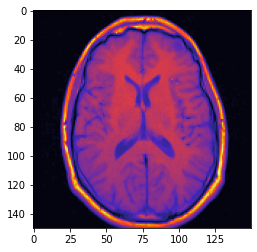

In [ ]:
plt.imshow(X[0],cmap='CMRmap')

In [ ]:
X_updated = X.reshape(len(X),-1)
X_updated.shape

(2880, 22500)

In [ ]:
from sklearn.model_selection import train_test_split 
read_imgtrain,read_imgtest,read_classestrain,read_classestest = train_test_split(X_updated,Y,random_state=10,test_size=.30)


In [ ]:
read_imgtrain.shape,read_imgtest.shape

((2016, 22500), (864, 22500))

In [ ]:
Xtrain = read_imgtrain/255
Xtest = read_imgtest/255
print(Xtrain.max(),Xtrain.min())
print(Xtest.max(),Xtest.min())


1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA
print(Xtrain.shape,Xtest.shape)
pca = PCA(.98)
pca_train = Xtrain
pca_test = Xtest



(2016, 22500) (864, 22500)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train,read_classestrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
sv = SVC()
sv.fit(pca_train,read_classestrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(" Training Score :",lg.score(pca_train,read_classestrain))
print(" Testing Score :",lg.score(pca_test,read_classestest))

 Training Score : 0.9990079365079365
 Testing Score : 0.7800925925925926


In [ ]:
print("Training Score :",sv.score(pca_train,read_classestrain))
print("Testing Score :",sv.score(pca_test,read_classestest))

Training Score : 0.9389880952380952
Testing Score : 0.7997685185185185


In [ ]:
pred = sv.predict(pca_test)
np.where(read_classestest != pred)

(array([  1,   3,   5,   8,  25,  28,  33,  45,  46,  54,  56,  57,  62,
         66,  67,  73,  83,  84,  86,  87,  92,  94,  98, 100, 104, 110,
        111, 112, 113, 121, 124, 125, 127, 135, 144, 148, 152, 153, 161,
        166, 168, 171, 177, 179, 181, 190, 206, 207, 222, 224, 225, 226,
        227, 229, 236, 237, 242, 243, 249, 251, 253, 254, 256, 262, 268,
        269, 278, 283, 292, 294, 297, 302, 306, 307, 318, 321, 324, 334,
        338, 343, 348, 354, 356, 365, 368, 372, 375, 390, 392, 422, 429,
        430, 447, 456, 457, 461, 472, 473, 480, 489, 518, 523, 528, 529,
        530, 538, 540, 542, 546, 550, 554, 557, 558, 561, 562, 565, 580,
        586, 600, 606, 607, 608, 612, 615, 616, 619, 624, 637, 639, 646,
        655, 661, 667, 668, 674, 677, 679, 681, 685, 693, 695, 701, 707,
        721, 730, 731, 744, 745, 752, 756, 761, 764, 767, 772, 773, 776,
        780, 781, 783, 784, 793, 794, 799, 800, 802, 807, 820, 832, 834,
        837, 842, 850, 858]),)

In [ ]:
pred[112]

0

In [ ]:
read_classestest[112]

3

In [ ]:
dec = {0:'No tumor',1:'Posititve'}

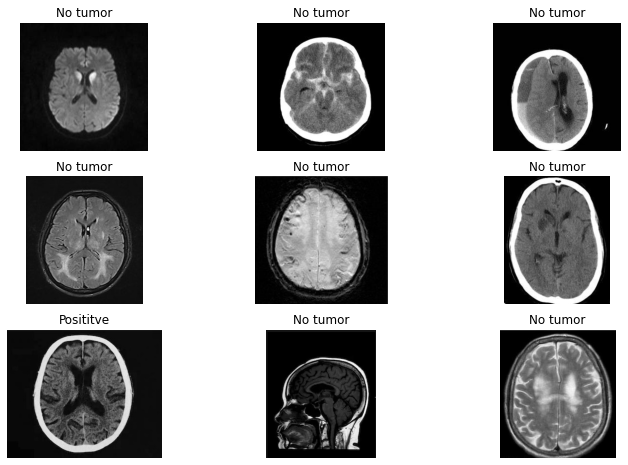

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Brain_tumor/DataSet/archive/Testing')
c = 1
for i in os.listdir('/content/drive/MyDrive/Brain_tumor/DataSet/archive/Testing/no_tumor/')[:9]:
  plt.subplot(3,3,c)

  img = cv2.imread('/content/drive/MyDrive/Brain_tumor/DataSet/archive/Testing/no_tumor/'+i,0)
  img1 =cv2.resize(img,(150,150))
  img1 = img1.reshape(1,-1)/255
  p = sv.predict(img1)[0]
  if p!=0 : p=1
  plt.title(dec[p])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

In [ ]:
import pickle
pickle.dump(lg,open("logistic.pkl","wb"))

In [ ]:
log = pickle.load(open("/content/logistic.pkl","rb"))

In [ ]:
pickle.dump(sv,open("supportVector.pkl","wb"))